## Importing Libraries and Data

In [12]:
# import libraries
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
# path
path = r'/Users/michele/Desktop/CF/files/Module4/Instacart'

In [16]:
# import orders_products_customers datset
df_ords = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'orders_products_customers.pkl'))

## Visualisations

<b>Create a histogram of the “order_hour_of_day” column.</b>

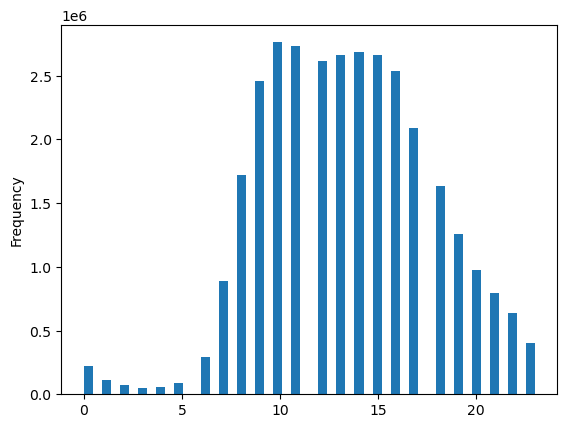

In [17]:
# Histogram for order_hour_of_day
hist = df_ords['order_hour_of_day'].plot.hist(bins = 50)

The highest number of orders is recorded during working hours, between 8 a.m. and 6 p.m., with the highest peak between 9 a.m. and 11 a.m. 

<b>Create a bar chart from the “loyalty_flag” column.</b>

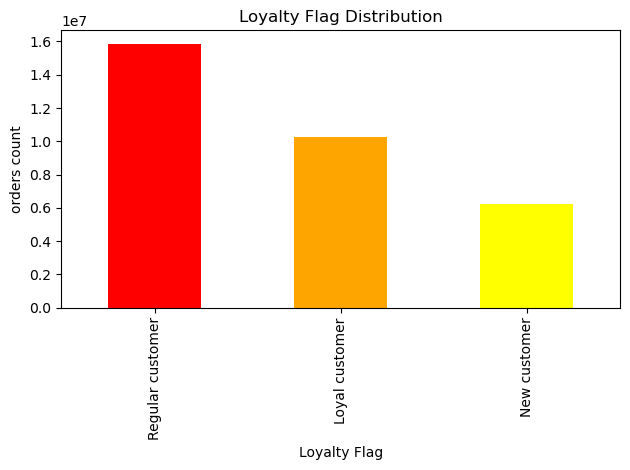

In [22]:
# bar chart for customer loyalty
bar = df_ords['loyalty_flag'].value_counts().plot.bar(color=['red', 'orange', 'yellow'])

# labels and title
plt.title('Loyalty Flag Distribution')
plt.xlabel('Loyalty Flag')
plt.ylabel('orders count')

# adjust layout to prevent labels from being cut off
plt.tight_layout()

# export the bar chart
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'loyalty.png'), bbox_inches='tight')

# Display the plot
plt.show()

<b>Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. </b>

In [24]:
# define samples for the line chart
np.random.seed(4)
dev = np.random.rand(len(df_ords)) <= 0.7

In [26]:
big = df_ords[dev]
small = df_ords[~dev]

In [23]:
# check lenght of the samples
len(df_ords)

32404859

In [25]:
len(big) + len(small)

32404859

In [30]:
# create dataframe with small sample
df = small[['order_hour_of_day', 'prices']]

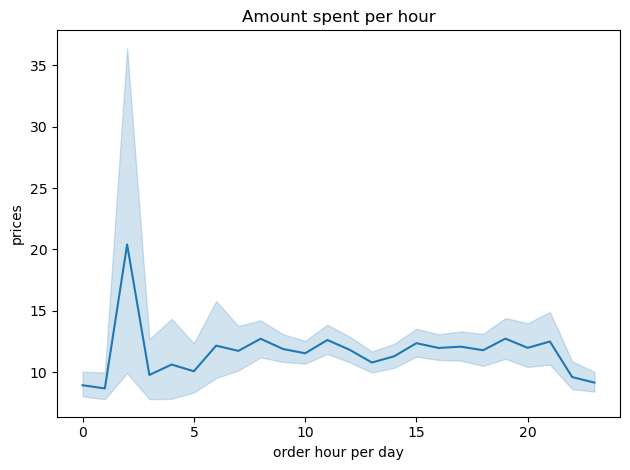

In [32]:
# create line graph for expense per hour
line = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

# labels and title
plt.title('Amount spent per hour')
plt.xlabel('order hour per day')
plt.ylabel('prices')

# adjust layout to prevent labels from being cut off
plt.tight_layout()

# export the bar chart
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'expense_hour_day.png'), bbox_inches='tight')

# Display the plot
plt.show()

the expenditure is more or less the same during the day, with a spike in the very  early morning. 

<b>Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents</b>

In [35]:
# create df for the line graph
df2 = small[['age', 'n_dependents']]

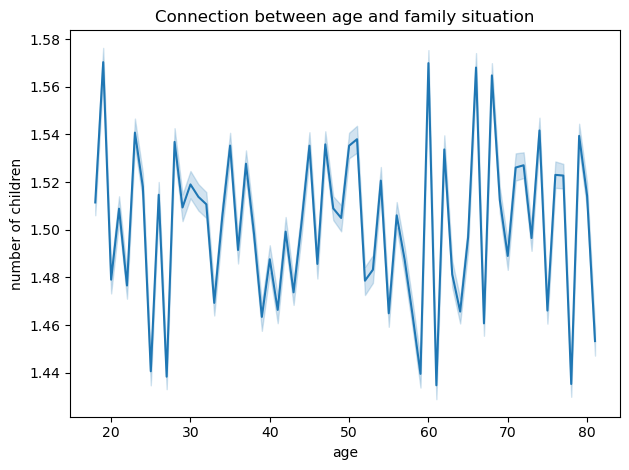

In [50]:
# line graph for the family situation
line2 = sns.lineplot(data = df2, x = 'age', y = 'n_dependents')

# labels and title
plt.title('Connection between age and family situation')
plt.xlabel('age')
plt.ylabel('number of children')

# adjust layout to prevent labels from being cut off
plt.tight_layout()

# export the bar chart
line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'family_situation.png'), bbox_inches='tight')

# Display the plot
plt.show()

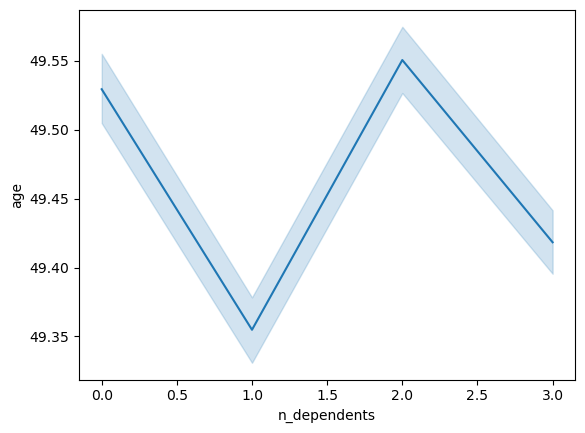

In [32]:
line3 = sns.lineplot(data = df2, x = 'n_dependents', y = 'age')

It seems to me that the graph is not very representative in this case, both because the y-axis does not contain the full scale of values, in fact in the next graph you can see that the n. of dependents in some cases reaches 3, a value that is out of scale in the first graph. 

In any case, there are no particular links between age and family status. 

<b>Create a scatterplot to visualise the connection between age and spending power (income).</b>

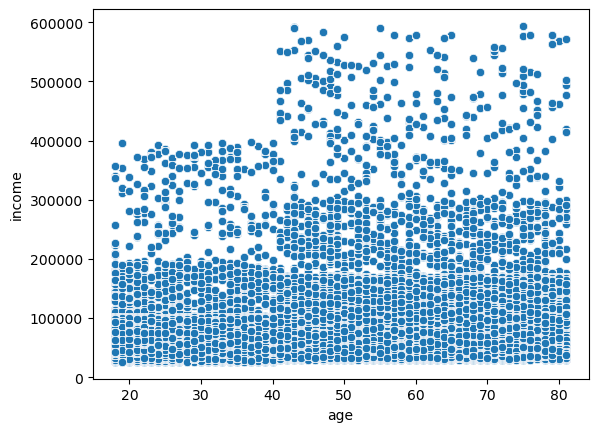

In [68]:
# Scatterplot for spending power
sct = sns.scatterplot(data = df_ords, x = 'age', y = 'income')

The distribution of spending power is fairly even, most concentrated below 200000 for all age groups. A noteworthy element is that the highest incomes of 400000 and upwards are only reached from the age of 40. 

## Export Visualisations

In [84]:
# export scatterplot income
sct.figure.savefig(os.path.join(path, 'Analysis', 'Visualisations', 'income.png'))